In [1]:
import pandas as pd 
from sklearn import svm, metrics, tree, ensemble
from sklearn.model_selection import  train_test_split 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
corr_csv = pd.read_csv("corr_0828.csv")
corr_df = pd.DataFrame(corr_csv).drop(['Unnamed: 0'], axis=1)

In [79]:
corr_df.describe()

,X,cen_Y,res_Y,les_Y,nn_Y
count,637.000000,637.000000,637.000000,637.000000,637.000000
mean,205.739403,83.477237,83.676609,83.335950,71.045526
std,14.346276,5.416449,6.021108,5.711087,5.778087
min,150.000000,71.000000,68.000000,73.000000,59.000000
25%,199.000000,78.000000,78.000000,78.000000,68.000000
50%,204.000000,84.000000,83.000000,83.000000,73.000000
75%,213.000000,88.000000,88.000000,88.000000,73.000000
max,262.000000,95.000000,98.000000,97.000000,88.000000


In [80]:
forw_df.describe()

,X,cen_Y,res_Y,les_Y,nn_Y
count,637.000000,637.000000,637.000000,637.000000,637.000000
mean,207.907378,79.910518,79.535322,80.436421,66.367347
std,11.834520,9.380488,9.508227,9.573998,10.644930
min,179.000000,58.000000,58.000000,58.000000,34.000000
25%,198.000000,75.000000,73.000000,73.000000,63.000000
50%,208.000000,80.000000,78.000000,82.000000,68.000000
75%,218.000000,86.000000,87.000000,88.000000,73.000000
max,238.000000,105.000000,102.000000,107.000000,88.000000


In [3]:
corr_df.columns = ['X','cen_Y','res_Y','les_Y','nn_Y']

In [4]:
corr_total = corr_df.copy()

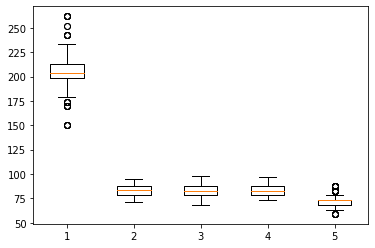

In [5]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


a = plt.boxplot(corr_total)
plt.show()

In [6]:
# columns = ['X','cen_Y','res_Y','les_Y','nn_Y']
co_1 = pd.DataFrame(corr_total["X"])
# co_2 = pd.DataFrame(corr_total["cen_Y"])
# co_3 = pd.DataFrame(corr_total["res_Y"])
# co_4 = pd.DataFrame(corr_total["les_Y"])
co_5 = pd.DataFrame(corr_total["nn_Y"])

In [7]:
import numpy as np
Q1co_1 = np.percentile(co_1, 25) 
Q3co_1 = np.percentile(co_1, 75) 
IQRco_1 = Q3co_1 - Q1co_1 
outlier_stepco_1 = 1.5 * IQRco_1

# Q1co_2 = np.percentile(co_2, 25) 
# Q3co_2 = np.percentile(co_2, 75) 
# IQRco_2 = Q3co_2 - Q1co_1 
# outlier_stepco_2 = 1.5 * IQRco_2

# Q1co_3 = np.percentile(co_3, 25) 
# Q3co_3 = np.percentile(co_3, 75) 
# IQRco_3 = Q3co_3 - Q1co_3 
# outlier_stepco_3 = 1.5 * IQRco_3

# Q1co_4 = np.percentile(co_4, 25) 
# Q3co_4 = np.percentile(co_4, 75) 
# IQRco_4 = Q3co_4 - Q1co_4 
# outlier_stepco_4 = 1.5 * IQRco_4

Q1co_5 = np.percentile(co_5, 25) 
Q3co_5 = np.percentile(co_5, 75) 
IQRco_5 = Q3co_5 - Q1co_5 
outlier_stepco_5 = 1.5 * IQRco_5

In [8]:
c_Yco_1 = (co_1 < Q1co_1 - outlier_stepco_1) | (co_1 > Q3co_1 + outlier_stepco_1)
c_Yco_1 = c_Yco_1.any(axis=1)
search_dfco_1 = co_1[c_Yco_1]

# c_Yco_2 = (co_2 < Q1co_2 - outlier_stepco_2) | (co_2 > Q3co_2 + outlier_stepco_2)
# c_Yco_2 = c_Yco_2.any(axis=1)
# search_dfco_2 = co_2[c_Yco_2]

# c_Yco_3 = (co_3 < Q1co_3 - outlier_stepco_3) | (co_3 > Q3co_3 + outlier_stepco_3)
# c_Yco_3 = c_Yco_3.any(axis=1)
# search_dfco_3 = co_3[c_Yco_3]

# c_Yco_4 = (co_4 < Q1co_4 - outlier_stepco_4) | (co_4 > Q3co_4 + outlier_stepco_4)
# c_Yco_4 = c_Yco_4.any(axis=1)
# search_dfco_4 = co_4[c_Yco_4]

c_Yco_5 = (co_5 < Q1co_5 - outlier_stepco_5) | (co_5 > Q3co_5 + outlier_stepco_5)
c_Yco_5 = c_Yco_5.any(axis=1)
search_dfco_5 = co_5[c_Yco_5]

In [9]:
corr_total1 = corr_total.copy().drop(search_dfco_1.index, axis=0)
# corr_total2 = corr_total.copy().drop(search_dfco_2.index, axis=0)
corr_total2 = corr_total.copy()
# corr_total3 = corr_total.copy().drop(search_dfco_3.index, axis=0)
corr_total3 = corr_total.copy()
# corr_total4 = corr_total.copy().drop(search_dfco_4.index, axis=0)
corr_total4 = corr_total.copy()
corr_total5 = corr_total.copy().drop(search_dfco_5.index, axis=0)

In [10]:
corr_total1 = corr_total1.drop(columns=['cen_Y','res_Y','les_Y','nn_Y'])
corr_total2 = corr_total2.drop(columns=['X','res_Y','les_Y','nn_Y'])
corr_total3 = corr_total3.drop(columns=['X','cen_Y','les_Y','nn_Y'])
corr_total4 = corr_total4.drop(columns=['X','cen_Y','res_Y','nn_Y'])
corr_total5 = corr_total5.drop(columns=['X','cen_Y','res_Y','les_Y'])

In [15]:
corr_total5

,nn_Y
0,78
1,78
2,73
3,68
4,68
...,...
632,68
633,68
634,68
635,68


In [16]:
corr_tot = corr_total1.join(corr_total2, how="right")
corr_tot = corr_tot.join(corr_total3, how="right")
corr_tot = corr_tot.join(corr_total4, how="right")
corr_tot = corr_tot.join(corr_total5, how="right")

In [24]:
corr_modi_df = corr_tot.dropna()

In [25]:
corr_modi_df

,X,cen_Y,res_Y,les_Y,nn_Y
0,208.0,89,92,87,78
1,208.0,89,92,87,78
2,228.0,85,88,83,73
3,218.0,83,83,83,68
4,218.0,83,83,83,68
...,...,...,...,...,...
632,218.0,81,78,83,68
633,218.0,81,78,83,68
634,218.0,81,78,83,68
635,218.0,83,83,83,68


In [26]:
c_labels = ["0" for i in range(len(corr_modi_df))]
c_labels_df = pd.DataFrame(c_labels, columns=["c_labels"]); c_labels_df

,c_labels
0,0
1,0
2,0
3,0
4,0
...,...
579,0
580,0
581,0
582,0


In [27]:
# corr_data = corr_ratio_df.join(c_labels_df, how="right"); corr_data.head()
corr_modi_df = corr_modi_df.join(c_labels_df, how="right"); 

In [37]:
corr_modi_df = corr_modi_df.dropna()
corr_modi_df = corr_modi_df.reset_index()

In [57]:
corr_modi_df = corr_modi_df.drop(columns=["index"])

In [39]:
forw_csv = pd.read_csv("forw_0828.csv") 
forw_df = pd.DataFrame(forw_csv).drop(['Unnamed: 0'], axis=1)

In [40]:
forw_df.columns = ['X','cen_Y','res_Y','les_Y','nn_Y']

In [41]:
forw_total = forw_df.copy()

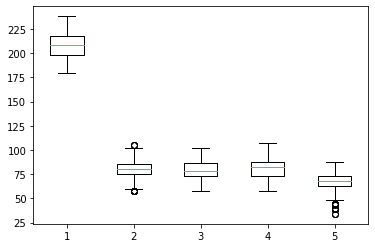

In [42]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


b = plt.boxplot(forw_total)
plt.show()

In [43]:
# columns = ['X','cen_Y','res_Y','les_Y','nn_Y']
# fo_1 = pd.DataFrame(forw_total["X"])
fo_2 = pd.DataFrame(forw_total["cen_Y"])
# fo_3 = pd.DataFrame(forw_total["res_Y"])
# fo_4 = pd.DataFrame(forw_total["les_Y"])
fo_5 = pd.DataFrame(forw_total["nn_Y"])

In [45]:
# Q1fo_1 = np.percentile(fo_1, 25) 
# Q3fo_1 = np.percentile(fo_1, 75) 
# IQRfo_1 = Q3fo_1 - Q1fo_1 
# outlier_stepfo_1 = 1.5 * IQRfo_1

Q1fo_2 = np.percentile(fo_2, 25) 
Q3fo_2 = np.percentile(fo_2, 75) 
IQRfo_2 = Q3fo_2 - Q1fo_2
outlier_stepfo_2 = 1.5 * IQRfo_2

# Q1fo_3 = np.percentile(fo_3, 25) 
# Q3fo_3 = np.percentile(fo_3, 75) 
# IQRfo_3 = Q3fo_3 - Q1fo_3 
# outlier_stepfo_3 = 1.5 * IQRfo_3

# Q1fo_4 = np.percentile(fo_4, 25) 
# Q3fo_4 = np.percentile(fo_4, 75) 
# IQRfo_4 = Q3fo_4 - Q1fo_4 
# outlier_stepfo_4 = 1.5 * IQRfo_4

Q1fo_5 = np.percentile(fo_5, 25) 
Q3fo_5 = np.percentile(fo_5, 75) 
IQRfo_5 = Q3fo_5 - Q1fo_5 
outlier_stepfo_5 = 1.5 * IQRfo_5

In [46]:
# f_Yfo_1 = (fo_1 < Q1fo_1 - outlier_stepfo_1) | (fo_1 > Q3fo_1 + outlier_stepfo_1)
# f_Yfo_1 = f_Yfo_1.any(axis=1)
# search_dffo_1 = fo_1[f_Yfo_1]

f_Yfo_2 = (fo_2 < Q1fo_2 - outlier_stepfo_2) | (fo_2 > Q3fo_2 + outlier_stepfo_2)
f_Yfo_2 = f_Yfo_2.any(axis=1)
search_dffo_2 = fo_2[f_Yfo_2]

# f_Yfo_3 = (fo_3 < Q1fo_3 - outlier_stepfo_3) | (fo_3 > Q3fo_3 + outlier_stepfo_3)
# f_Yfo_3 = f_Yfo_3.any(axis=1)
# search_dffo_3 = fo_3[f_Yfo_3]

# f_Yfo_4 = (fo_4 < Q1fo_4 - outlier_stepfo_4) | (fo_4 > Q3fo_4 + outlier_stepfo_4)
# f_Yfo_4 = f_Yfo_4.any(axis=1)
# search_dffo_4 = fo_4[f_Yfo_4]

f_Yfo_5 = (fo_5 < Q1fo_5 - outlier_stepfo_5) | (fo_5 > Q3fo_5 + outlier_stepfo_5)
f_Yfo_5 = f_Yfo_5.any(axis=1)
search_dffo_5 = fo_5[f_Yfo_5]

In [47]:
# forw_total1 = forw_total.copy().drop(search_dffo_1.index, axis=0)
forw_total1 = forw_total.copy()
forw_total2 = forw_total.copy().drop(search_dffo_2.index, axis=0)
# forw_total3 = forw_total.copy().drop(search_dffo_3.index, axis=0)
forw_total3 = forw_total.copy()
# forw_total4 = forw_total.copy().drop(search_dffo_4.index, axis=0)
forw_total4 = forw_total.copy()
forw_total5 = forw_total.copy().drop(search_dffo_5.index, axis=0)

In [48]:
forw_total1 = forw_total1.drop(columns=['cen_Y','res_Y','les_Y','nn_Y'])
forw_total2 = forw_total2.drop(columns=['X','res_Y','les_Y','nn_Y'])
forw_total3 = forw_total3.drop(columns=['X','cen_Y','les_Y','nn_Y'])
forw_total4 = forw_total4.drop(columns=['X','cen_Y','res_Y','nn_Y'])
forw_total5 = forw_total5.drop(columns=['X','cen_Y','res_Y','les_Y'])

In [49]:
forw_tot = forw_total1.join(forw_total2, how="right")
forw_tot = forw_tot.join(forw_total3, how="right")
forw_tot = forw_tot.join(forw_total4, how="right")
forw_tot = forw_tot.join(forw_total5, how="right")

In [51]:
forw_modi_df = forw_tot.dropna()
forw_modi_df.reset_index()

,index,X,cen_Y,res_Y,les_Y,nn_Y
0,0,203.0,73.0,68,78,63
1,1,203.0,76.0,73,78,63
2,2,203.0,78.0,78,78,68
3,3,233.0,68.0,68,68,54
4,4,233.0,68.0,68,68,54
...,...,...,...,...,...,...
595,632,223.0,70.0,68,73,59
596,633,223.0,70.0,68,73,59
597,634,223.0,70.0,68,73,54
598,635,223.0,70.0,68,73,59


In [52]:
f_labels = ["1" for i in range(len(forw_modi_df))]
f_labels_df = pd.DataFrame(f_labels, columns=["f_labels"]); f_labels_df

,f_labels
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [53]:
# forw_data = forw_ratio_df.join(f_labels_df, how="right")
forw_modi_df = forw_modi_df.join(f_labels_df, how="right"); forw_modi_df.head()

,X,cen_Y,res_Y,les_Y,nn_Y,f_labels
0,203.0,73.0,68.0,78.0,63.0,1
1,203.0,76.0,73.0,78.0,63.0,1
2,203.0,78.0,78.0,78.0,68.0,1
3,233.0,68.0,68.0,68.0,54.0,1
4,233.0,68.0,68.0,68.0,54.0,1


In [54]:
forw_modi_df = forw_modi_df.dropna()

In [58]:
corr_modi_df.columns = ["X_data", "ES_cen", "LES", "RES", "NN", "labels"]
forw_modi_df.columns = ["X_data", "ES_cen", "LES", "RES", "NN", "labels"]

In [59]:
total_data = pd.concat([corr_modi_df, forw_modi_df])

In [60]:
total_data

,X_data,ES_cen,LES,RES,NN,labels
0,208.0,89.0,92.0,87.0,78.0,0
1,208.0,89.0,92.0,87.0,78.0,0
2,228.0,85.0,88.0,83.0,73.0,0
3,218.0,83.0,83.0,83.0,68.0,0
4,218.0,83.0,83.0,83.0,68.0,0
...,...,...,...,...,...,...
595,208.0,63.0,58.0,68.0,48.0,1
596,208.0,66.0,63.0,68.0,48.0,1
597,208.0,61.0,58.0,63.0,48.0,1
598,213.0,75.0,73.0,78.0,63.0,1


In [61]:
data_shuffled = total_data.sample(frac=1)  # row 전체 shuffle

data_shuffled = total_data.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [62]:
data_shuffled = data_shuffled.dropna()

In [63]:
data_shuffled

,X_data,ES_cen,LES,RES,NN,labels
0,203.0,88.0,83.0,93.0,73.0,1
1,199.0,75.0,77.0,73.0,63.0,0
2,223.0,83.0,83.0,83.0,63.0,1
3,213.0,88.0,88.0,88.0,73.0,1
4,194.0,85.0,83.0,88.0,68.0,0
...,...,...,...,...,...,...
1094,223.0,88.0,88.0,88.0,73.0,1
1095,199.0,88.0,88.0,88.0,78.0,0
1096,208.0,88.0,83.0,93.0,73.0,1
1097,228.0,88.0,83.0,92.0,73.0,0


In [64]:
pose_data = data_shuffled[["X_data", "ES_cen", "LES", "RES", "NN"]]

# encoder = LabelEncoder()
# encoder.fit(data_shuffled["labels"])
# data_shuffled["labels"] = encoder.transform(data_shuffled["labels"])

pose_label = data_shuffled["labels"]

In [65]:
train_data, test_data , train_label, test_label  =  train_test_split(pose_data, pose_label, test_size=0.2)

# help( train_test_split )

In [66]:
# 이상치 제거 후
model = svm.SVC(  )
model.fit(train_data, train_label  ) 
pre = model.predict( test_data )
ac_score = metrics.accuracy_score( test_label, pre ) 
print("SVC 정답률 = " , ac_score)

SVC 정답률 =  0.509090909090909


In [67]:
# 제거 후
model1 = tree.DecisionTreeClassifier()
model1.fit(train_data, train_label)
pre1 = model1.predict(test_data)
ac_score1 = metrics.accuracy_score(test_label, pre1)
print("의사결정 트리 정답률 = ", ac_score1)

의사결정 트리 정답률 =  0.9090909090909091


In [68]:
# 제거 후
model3 = tree.ExtraTreeClassifier()
model3.fit(train_data, train_label)
pre3 = model3.predict(test_data)
ac_score3 = metrics.accuracy_score(test_label, pre3)
print("엑스트라 트리 회귀 정답률 = ", ac_score3)

엑스트라 트리 회귀 정답률 =  0.9090909090909091


In [69]:
# 제거 후
model4 = ensemble.RandomForestClassifier()
model4.fit(train_data, train_label)
pre4 = model4.predict(test_data)
ac_score4 = metrics.accuracy_score(test_label, pre4)
print("앙상블 랜덤포레스트 정답률 = ", ac_score4)

앙상블 랜덤포레스트 정답률 =  0.9181818181818182


In [70]:
# 제거 후
model5 = ensemble.AdaBoostClassifier()
model5.fit(train_data, train_label)
pre5 = model5.predict(test_data)
ac_score5 = metrics.accuracy_score(test_label, pre5)
print("아다부스트 정답률 = ", ac_score5)

아다부스트 정답률 =  0.7272727272727273


In [71]:
# 제거 후
model6 = ensemble.BaggingClassifier()
model6.fit(train_data, train_label)
pre6 = model6.predict(test_data)
ac_score6 = metrics.accuracy_score(test_label, pre6)
print("배깅 정답률 = ", ac_score6)

배깅 정답률 =  0.9227272727272727


In [72]:
# 제거 후
model7 = ensemble.GradientBoostingClassifier()
model7.fit(train_data, train_label)
pre7 = model7.predict(test_data)
ac_score7 = metrics.accuracy_score(test_label, pre7)
print("경사 부스팅 정답률 = ", ac_score7)


경사 부스팅 정답률 =  0.85


In [73]:
# 제거 후
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
model8 = ensemble.StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
model8.fit(train_data, train_label)
pre8 = model8.predict(test_data)
ac_score8 = metrics.accuracy_score(test_label, pre8)
print("스태킹 정답률 = ", ac_score8)

스태킹 정답률 =  0.9090909090909091


In [74]:
# 제거 후
model9 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="hard")
model9.fit(train_data, train_label)
pre9 = model9.predict(test_data)
ac_score9 = metrics.accuracy_score(test_label, pre9)
print("보팅 하드 정답률 = ", ac_score9)

보팅 하드 정답률 =  0.7272727272727273


In [75]:
# 제거 후
model9_1 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="soft")
model9_1.fit(train_data, train_label)
pre9_1 = model9_1.predict(test_data)
ac_score9_1 = metrics.accuracy_score(test_label, pre9_1)
print("보팅 소프트 정답률 = ", ac_score9_1)

보팅 소프트 정답률 =  0.8727272727272727


In [76]:
# 제거 후
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
model10 = ensemble.HistGradientBoostingClassifier()
model10.fit(train_data, train_label)
pre10 = model10.predict(test_data)
ac_score10 = metrics.accuracy_score(test_label, pre10)
print("히스트그래디언트부스팅 정답률 = ", ac_score10)

히스트그래디언트부스팅 정답률 =  0.8863636363636364


In [74]:
corr_test_csv = pd.read_csv('test2_corr.csv')

In [75]:
corr_test_df = pd.DataFrame(corr_test_csv)
corr_test_df

,c_X,c_Y
0,114,280
1,114,280
2,85,248
3,114,248
4,86,184
...,...,...
117,85,85
118,85,75
119,85,75
120,86,122


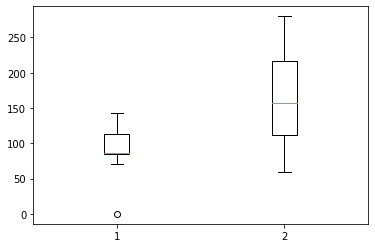

In [48]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


c = plt.boxplot(corr_test_df)
plt.show()

In [49]:
Q1_3 = np.percentile(corr_test_df["c_X"] , 25) 
Q3_3 = np.percentile(corr_test_df["c_X"] , 75) 
IQR_3 = Q3_3 - Q1_3 
outlier_step_3 = 1.5 * IQR_3

outlier_step_3

42.0

In [50]:
c_t_X = (corr_test_df < Q1_3 - outlier_step_3) | (corr_test_df > Q3_3 + outlier_step_3)
c_t_X = c_t_X.any(axis=1)
searcht_df = corr_test_df[c_t_X]
print(searcht_df)

    c_X  c_Y
0   114  280
1   114  280
2    85  248
3   114  248
4    86  184
..  ...  ...
57  114  208
58  114  256
59  114  256
60   99  159
83    0   59

[62 rows x 2 columns]


In [51]:
corr_test_df = corr_test_df.drop(searcht_df.index, axis=0)
print(corr_test_df)

     c_X  c_Y
61    99  154
62    85  128
63    85  133
64    85  133
65    85  133
66   100  144
67    86  144
68    72  118
69    71  107
70    71  123
71    72  129
72    71  112
73    86  113
74    86  112
75    86  118
76    85  139
77    85  150
78    85  144
79    85  133
80    71  123
81    85  123
82    72   64
84    86  123
85    86  128
86    71  123
87    71  112
88    85  133
89    86  138
90    71  144
91    71  133
92    71  101
93    71  101
94    71  101
95    85  106
96    71   96
97    71   96
98    85  106
99    86  112
100   86  138
101   86  133
102   85  117
103   85  112
104   86  112
105   86  112
106   85  107
107   85  102
108   86   86
109   86   91
110   85   86
111   85   75
112   86   80
113   85   91
114   85   96
115   86   95
116   86   85
117   85   85
118   85   75
119   85   75
120   86  122
121   86  122


In [53]:
corr_test_label = ["0" for i in range(len(corr_test_df))]
corr_test_label = pd.DataFrame(corr_test_label, columns=["labels"])

In [54]:
corr_test_data = corr_test_df.join(corr_test_label, how="right")

In [59]:
corr_test_data.columns = ["x_data", "y_data", "labels"]
corr_test_data

,x_data,y_data,labels
0,114,280,0
1,114,280,0
2,85,248,0
3,114,248,0
4,86,184,0
...,...,...,...
117,85,85,0
118,85,75,0
119,85,75,0
120,86,122,0


In [60]:
# from sklearn.preprocessing import LabelEncoder
# # LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(corr_test_data["labels"])
# corr_test_data["labels"] = encoder.transform(corr_test_data["labels"])
a = corr_test_data.values[: ,:2]

In [61]:
corr_pre = model.predict( a)

In [62]:
corr_score = metrics.accuracy_score( test_label[:122], corr_pre ) 
print("정답률 = " , corr_score)

정답률 =  0.5819672131147541


In [63]:
test_forw_csv = pd.read_csv('test2_forw.csv')

In [64]:
test_forw_df = pd.DataFrame(test_forw_csv)

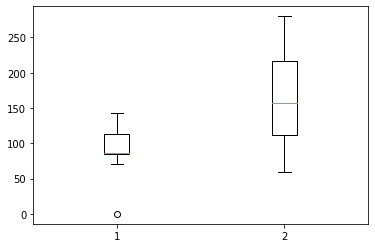

In [65]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


c = plt.boxplot(test_forw_df)
plt.show()

In [66]:
Q1_4 = np.percentile(test_forw_df , 25) 
Q3_4 = np.percentile(test_forw_df , 75) 
IQR_4 = Q3_4 - Q1_4 
outlier_step_4 = 1.5 * IQR_4

outlier_step_4

105.375

In [67]:
c_t_X = (corr_test_df < Q1_3 - outlier_step_3) | (corr_test_df > Q3_3 + outlier_step_3)
c_t_X = c_t_X.any(axis=1)
searcht_df = corr_test_df[c_t_X]
print(searcht_df)

    c_X  c_Y
0   114  280
1   114  280
2    85  248
3   114  248
4    86  184
..  ...  ...
57  114  208
58  114  256
59  114  256
60   99  159
83    0   59

[62 rows x 2 columns]


In [68]:
test_forw_label = ["1" for i in range(len(test_forw_df))]
test_forw_label = pd.DataFrame(test_forw_label, columns=["labels"])

In [69]:
test_forw_data = test_forw_df.join(test_forw_label, how="right")

In [71]:
test_forw_data.columns = ["x_data", "y_data", "labels"]
test_forw_data

,x_data,y_data,labels
0,114,280,1
1,114,280,1
2,85,248,1
3,114,248,1
4,86,184,1
...,...,...,...
117,85,85,1
118,85,75,1
119,85,75,1
120,86,122,1


In [72]:

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(test_forw_data["labels"])
# test_forw_data["labels"] = encoder.transform(test_forw_data["labels"])
b = test_forw_data.values[: ,:2]

In [73]:
forw_pre = model.predict(b)

In [74]:
forw_score = metrics.accuracy_score( test_label[:122], forw_pre ) 
print("정답률 = " , forw_score)

정답률 =  0.5819672131147541


In [75]:
total_test = pd.concat([corr_test_data,test_forw_data]); total_test

,x_data,y_data,labels
0,114,280,0
1,114,280,0
2,85,248,0
3,114,248,0
4,86,184,0
...,...,...,...
117,85,85,1
118,85,75,1
119,85,75,1
120,86,122,1


In [76]:
total_shuffled = total_test.sample(frac=1)  # row 전체 shuffle

total_shuffled = total_test.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [77]:
total_shuffled.dropna()

,x_data,y_data,labels
0,71,112,1
1,142,240,0
2,85,96,1
3,86,184,0
4,114,208,1
...,...,...,...
239,85,128,0
240,85,192,0
241,114,248,1
242,71,101,1


In [78]:
# encoder = LabelEncoder()
# encoder.fit(total_shuffled["labels"])
# total_shuffled["labels"] = encoder.transform(total_shuffled["labels"])
c = total_shuffled.values[: ,:2]

In [79]:
total_pre = model.predict(c)

In [80]:
total_score = metrics.accuracy_score( test_label[:244], total_pre ) 
print("정답률 = " , total_score)

정답률 =  0.5491803278688525


In [82]:
total_pre1 = model10.predict(c)
total_score1 = metrics.accuracy_score(test_label[:244], total_pre1)
print("히스트그래디언트부스팅 정답률 = ", total_score1)

히스트그래디언트부스팅 정답률 =  0.5327868852459017


In [83]:
total_pre2 = model9.predict(c)
total_score2 = metrics.accuracy_score(test_label[:244], total_pre2)
print("보팅 하드 정답률 = ", total_score2)

보팅 하드 정답률 =  0.5491803278688525


In [84]:
total_pre3 = model4.predict(c)
total_score3 = metrics.accuracy_score(test_label[:244], total_pre3)
print("앙상블 랜덤포레스트 정답률 = ", total_score3)

앙상블 랜덤포레스트 정답률 =  0.5327868852459017


In [86]:
total_pre4 = model8.predict(c)
total_score4 = metrics.accuracy_score(test_label[:244], total_pre4)
print("스태킹 정답률 = ", total_score4)

스태킹 정답률 =  0.5327868852459017
